# **IBM SkillsBuild edunet Foundations**
---

# **Sentiment Analysis of Restaurant Reviews**

## Author : Cheruku Bhanu Prakash


# **Connecting Drive**

---



In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# **Importing Important Libraries**

---



In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## About Dataset

**Sentiment Analysis of Restaurant Reviews**

The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression. In the end, we hope to find a "best" model for predicting the review's sentiment.

**Dataset**: Restaurant_Reviews.tsv is a dataset from Kaggle datasets which consists of 1000 reviews on a restaurant.


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv",delimiter="\t",quoting=3)
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


# **Data Wrangling**


---


<ul>
<li>Cleaning only the alphabetical data.</li>
<li>Making all data lowercase.</li>
<li>Removing Stopwords.</li>
</ul>

---

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as ps

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []

for i in range(0,1000):

  review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
  review = review.lower()
  review_words = review.split()
  review_words = [ word for word in review_words if not word in set(stopwords.words('english'))]
  review = [ps().stem(word) for word in review_words]
  review = ' '.join(review)
  corpus.append(review)

corpus[:1000]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[: ,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# **Multinomial Naive Baise Classifier**

---




In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier =  MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 76.5%
The precision score for the model is 76.41509433962264%
The recall score for the model is 78.64077669902912%


<h3>Hyperparameter Tuning</h3>

In [ ]:
best_score = 0.0
alp = 0.0
for i in np.arange (0.1,1.1,0.1):
  classifier = MultinomialNB(alpha = i)
  classifier.fit(X_train,y_train)
  y_predict = classifier.predict(X_test)
  score = accuracy_score(y_test,y_predict)
  if score > best_score:
    best_score = score
    alp = i

print("Best accuracy Score is "+str(best_score*100)+" for alpha "+str(alp))

Best accuracy Score is 78.5 for alpha 0.2


<h3>Using the best model as per hyperparameter tuning</h3>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier =  MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 78.5%
The precision score for the model is 77.77777777777779%
The recall score for the model is 81.55339805825243%


<h3>Testing the model Against Random Inputs</h3>

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Negative
The review 3 is Negative
The review 4 is Positive
The review 5 is Negative


# **Logistic Regression**

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 77.5%
The precision score for the model is 77.22772277227723%
The recall score for the model is 78.0%


<h3>Testing the model against random inputs.</h3>

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Positive
The review 3 is Negative
The review 4 is Positive
The review 5 is Negative


# **Decision Tree Classifier**


---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=1)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 57.99999999999999%
The precision score for the model is 100.0%
The recall score for the model is 16.0%


<h3>Hyperparameter Tuning</h3>

In [ ]:
best_score = 0.0
dep = 0
for i in range (10,100):
  classifier = DecisionTreeClassifier(criterion="entropy", max_depth=i)
  classifier.fit(X_train,y_train)
  y_predict = classifier.predict(X_test)
  score = accuracy_score(y_test,y_predict)
  if score > best_score:
    best_score = score
    dep = i

print("Best accuracy Score is "+str(best_score*100)+" for max_depth "+str(dep))

Best accuracy Score is 79.0 for max_depth 30


<h3>Using the best model as per hyperparameter tuning</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=30)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 79.0%
The precision score for the model is 88.1578947368421%
The recall score for the model is 67.0%


<h3>Testing the model against random inputs.</h3>

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Positive
The review 3 is Negative
The review 4 is Negative
The review 5 is Negative


# **Random Forest Classifier**

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion="entropy")
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 77.0%
The precision score for the model is 80.68181818181817%
The recall score for the model is 71.0%


<h3>Hyperparameter tuning</h3>

In [ ]:
best_score = 0.0
dep = 0
for i in range (1,50):
  classifier = RandomForestClassifier(criterion="entropy", max_depth=i)
  classifier.fit(X_train,y_train)
  y_predict = classifier.predict(X_test)
  score = accuracy_score(y_test,y_predict)
  if score > best_score:
    best_score = score
    dep = i

print("Best accuracy Score is "+str(best_score*100)+" for max_depth "+str(dep))

Best accuracy Score is 81.0 for max_depth 19


<h3>Using the best model as per hyperparameter tuning.</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion="entropy", max_depth=dep)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19)

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 81.0%
The precision score for the model is 84.44444444444444%
The recall score for the model is 76.0%


<h3>Testing the model against random input.</h3>

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Negative
The review 3 is Negative
The review 4 is Negative
The review 5 is Negative


# **Extra Trees Classifier**

---



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()
classifier.fit(X_train,y_train)

ExtraTreesClassifier()

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 77.5%
The precision score for the model is 78.94736842105263%
The recall score for the model is 75.0%


<h3>Hyperparameter Tuning</h3>

In [ ]:
best_score = 0.0
dep = 0
for i in range (1,50):
  classifier = ExtraTreesClassifier(criterion="entropy", max_depth=i)
  classifier.fit(X_train,y_train)
  y_predict = classifier.predict(X_test)
  score = accuracy_score(y_test,y_predict)
  if score > best_score:
    best_score = score
    dep = i

print("Best accuracy Score is "+str(best_score*100)+" for max_depth "+str(dep))

Best accuracy Score is 81.5 for max_depth 49


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(criterion="entropy", max_depth=dep)
classifier.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=49)

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 80.0%
The precision score for the model is 84.0909090909091%
The recall score for the model is 74.0%


<h3>Testing the model against random input</h3>

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Negative
The review 3 is Negative
The review 4 is Positive
The review 5 is Negative


# **KNeighborsClassifier**

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 63.5%
The precision score for the model is 69.56521739130434%
The recall score for the model is 48.0%


<h3>Hyperparameter Tuning</h3>

In [ ]:
best_score = 0.0
n = 0
for i in range (1,100):
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(X_train,y_train)
  y_predict = classifier.predict(X_test)
  score = accuracy_score(y_test,y_predict)
  if score > best_score:
    best_score = score
    n = i

print("Best accuracy Score is "+str(best_score*100)+" for neighbours "+str(n))

Best accuracy Score is 67.5 for neighbours 21


<h3>Using the best model as per hyperparameter tuning</h3>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=n)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=21)

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 66.5%
The precision score for the model is 86.66666666666667%
The recall score for the model is 39.0%


<h3> Testing the model against random inputs.

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Negative
The review 2 is Positive
The review 3 is Negative
The review 4 is Positive
The review 5 is Negative


# **Support Vector Classification (SVC)**

---



In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 77.5%
The precision score for the model is 79.56989247311827%
The recall score for the model is 74.0%


<h3>Hyperparameter Tuning</h3>

In [ ]:
best_score = 0.0
g = 0
for i in range (0,100):
  classifier = SVC(kernel='linear',gamma=i)
  classifier.fit(X_train,y_train)
  y_predict = classifier.predict(X_test)
  score = accuracy_score(y_test,y_predict)
  if score > best_score:
    best_score = score
    g = i

print("Best accuracy Score is "+str(best_score*100)+" for neighbours "+str(g))

Best accuracy Score is 76.5 for neighbours 0


*Note : The best model is before we do hyperparameter tuning so we will use the same model before the tuning.*

<h3>Testing the model against random inputs.</h3>

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Positive
The review 3 is Negative
The review 4 is Positive
The review 5 is Negative


# **Conclusion**

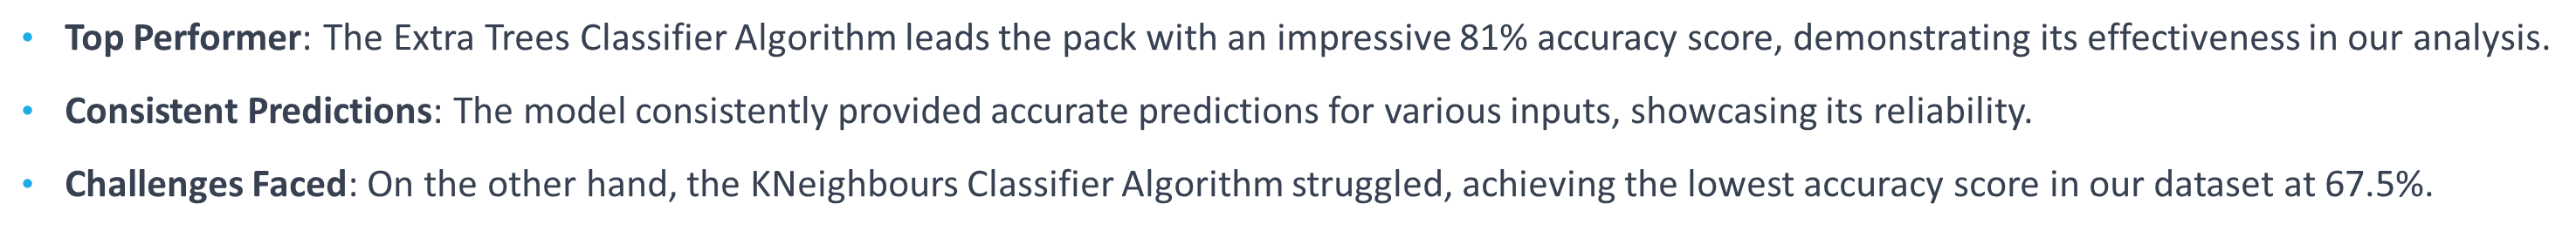

# **Analysis and Conclusion**
In this study, an attempt has been made to classify sentiment analysis for restaurant reviews using machine learning techniques. Seven algorithms namely Multinomial Naive Bayes, Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Extra Tree Classifier, K Neighbors Classifier, Support Vector Classification  

# Evaluation metrics used here are accuracy, precision and recall.

Using **Multinomial Naive Bayes**,

- Accuracy of prediction is 76.5%

- Precision of prediction is 76.41509433962264%

- Recall of prediction is 78.64077669902912%

Using **Logistic Regression**

- The accuracy score for the model is 77.5%

- The precision score for the model is 77.22772277227723%

- The recall score for the model is 78.0%

Using **Decision Tree Classifier**

- The accuracy score for the model is 57.99999999999999%

- The precision score for the model is 100.0%

- The recall score for the model is 16.0%

Using **Random Forest Classifier**

- The accuracy score for the model is 77.0%

- The precision score for the model is 80.68181818181817%

- The recall score for the model is 71.0%

Using **Extra Tree Classifier**

- The accuracy score for the model is 77.5%

- The precision score for the model is 78.94736842105263%

- The recall score for the model is 75.0%

Using **K Neighbors Classifier**

- The accuracy score for the model is 63.5%

- The precision score for the model is 69.56521739130434%

- The recall score for the model is 48.0%

Using **Support Vector Classification (SVC)**

- The accuracy score for the model is 77.5%

- The precision score for the model is 79.56989247311827%

- The recall score for the model is 74.0%